<center>
    <h1>Local fracking summary</h1>
    <h2>using census tracts</h2>
Aug 2023 - gary.allison@gmail.com
</center>

This worksheet produces a summary of the chemicals used in a given set of census tracts.

In [2]:
%run intg_support/local_frack_demo.py
import urllib
urllib.request.urlretrieve('https://storage.googleapis.com/gwa-test/tlgdb_2014_a_06_ca.gdb.zip',
                          'tlgdb_2014_a_06_ca.gdb.zip')

from IPython.display import HTML, display
from IPython.display import Markdown as md

# and fetch the census tract data
fn = r"tlgdb_2014_a_06_ca.gdb.zip" # note that CA uses last decade's census tracts
import geopandas as gpd
gdf = gpd.read_file(fn,layer='Census_Tract',dtype={'GEOID':str})


<IPython.core.display.Javascript object>

# Find your census tract(s) of interest.
Currently, the way to indicate these is to paste them in.  They will be plotted on a map before summaries are produced.
I used the Cal maps and got the ID number of the census tracts from the popups.  You can add more tracts within each area or whole new sets below.

In [3]:
# Enter your census tract(s) of interest in the same style as the other lists below
# Note that the codes should be 11 digits long.  Some maps drop leading zeros, so add them in to get 11 digits.

# Shafter, CA
shafter = ['6029003900','6029004101','6029004102','6029004000']

# Kern River oilfield
kern_river = ['06029000200','06029000300','06029000400','06029000101','6029000102','06029005103']
#kern_river = ['06029005103']

# Arvin
arvin =['06029006304','6029006301','6029006303']

# Lost Hills - Only one tract, but it is big!
lost_hills = ['6029004500']

# enter the name of the focal area you want:

In [4]:
census_tracts = lost_hills

In [5]:
ctlist = []
for prospective in census_tracts:
    tlst = gdf[gdf.GEOID.str.contains(prospective)].GEOID.tolist()
    for i in tlst:
        ctlist.append(i)

print(ctlist)
target = gdf[gdf.GEOID.isin(ctlist)]

# target = gdf
print(f'Number of census tracts in this set that match the US census database: {len(target)}')
# target.head()

['06029004500']
Number of census tracts in this set that match the US census database: 1


Notes about my selection of census tracts:
- CalEnviroScreen apparently does not use the 2020 updated census tracts, but rather last decade's.
- Selection of specific tracts is critical.  I am finidng that much of the margins of towns are in unincorporated tracts that are not labelled with the town's name.  Should they be included???  Sometimes those unincorporated tracts are really large - they pull in lots of area beyond the town.
- Try the city search feature in CalEnviroScreen for places like Shafter and Arvin.


## Map focal areas

In [6]:
import folium
style = {'fillColor': '#00000000', 'color': '#0000FFFF'}
center = [target.INTPTLAT.iloc[0],target.INTPTLON.iloc[0]]
map = folium.Map(location=center, zoom_start=10)

folium.GeoJson(target,style_function=lambda x: style,smooth_factor=.2).add_to(map)
map

In [7]:
target['focus'] = 'test'
focal_area = target[['focus','geometry']].copy()
diss = focal_area.dissolve(by='focus')

C:\Users\garya\anaconda3\envs\datawork\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [8]:
import warnings
warnings.filterwarnings("ignore")
apis = locate_wells_within_area(df[df.bgCountyName=='kern'],target,0)
gt.showWells_in_area(df[df.bgCountyName=='kern'],diss,apis)

Number of wells = 837


---
# Well information

In [9]:
t, dgb = show_well_info(apis)

# How big are the fracking jobs?

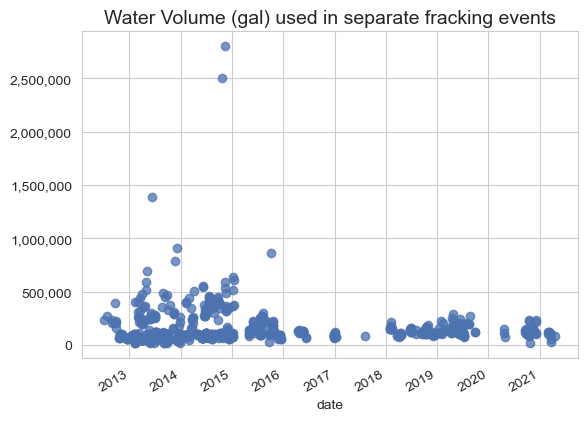

In [10]:
show_water_used(dgb)

# What chemicals are used?
### All fracking jobs combined

In [11]:
show_chem_summary(t)

|Explanation of columns in the index|
| :---: |

| Column      | Description |
| :----: | :-------- |
|*Material*| at top is the CAS registration number of the chemical. **Click on this link** to display summary of this chemical for all of FracFocus (filtered data - up to last major update). Below are two names for the material: the upper is used by SciFinder as the primary name and the lower is the most common reported name in FracFocus| 
|*ref*|Click on the "csv" link to a csv-formatted file that has all the filtered records for this chemical.  Click on "PubChem" link for a PubChem web search for this chemical.  Click on "EPA: CompTox" for the summary page in that resource|
|*total num records* |indicates the number of records across the FracFocus data. A given chemical may appear more than once in a disclosure. |
|*num records with mass*|indicates the number of records with mass of this chemical in the **filtered** data. Without mass, a record only indicates **presence** in the disclosure.|
|*Total mass used (lbs)*| the sum of the computable mass of all records in the set|
|*Chemicals of Concern* |indicates if the chemical is on one of the following lists.  Type the name of the list into the Search box to limit to those chemicals.<br> - **CWA**: indicates that the chemical is on the [Clean Water Act list](https://comptox.epa.gov/dashboard/chemical_lists/CWA311HS) as compiled in EPA's CompTox<br>- **DWSHA**: indicated that the chemical is on the EPA's [Drinking Water Safety and Health Advisory](https://comptox.epa.gov/dashboard/chemical_lists/EPADWS) list<br>- **TEDX**: indicates that the chemical is on [The Endocrine Disruption Exchange](https://endocrinedisruption.org) list<br>- **prop_65**: indicates that the chemical is on [California's Proposition 65](https://oehha.ca.gov/proposition-65/proposition-65-list) list<br>- **EPA_PFAS**: indicates that the chemical is on EPA's comprehensive list of PFAS related compounds<br>- **EPA_volatile**: indicates that the chemical is on the EPA's volatile chemical list<br>- **UVCB**: indicates that the chemical is on the [TSCA list of "Unknown, Variable composition, Complex reaction products and Biological"](https://www.epa.gov/sites/default/files/2015-05/documents/uvcb.pdf) materials, meaning "these chemical substances cannot be represented by unique structures and molecular formulas."<br>- **diesel**: indicates that the chemical is [on the EPA list that](https://www.epa.gov/uic/diesel-fuels-hydraulic-fracturing-dfhf) "represent the most appropriate interpretation of the statutory term 'diesel fuels' to use for permitting diesel fuels hydraulic fracturing under the UIC Program nationwide.|
